In [1]:
from data import *
from models import *
from utils import *
import PIL.Image as Image

In [2]:
transform = transforms.Compose([transforms.RandomAffine(degrees=0,
                                                    translate=(0.2, 0.2),
                                                       scale = (.9,1.1)),
                               transforms.ToTensor()])
# transform = transforms.ToTensor()
data = MNIST_traindata('data/', transform, train=False)
dataloader = DataLoader(data, batch_size=16, shuffle=True)

In [3]:
real_imgs, cut_imgs, class_imgs, labels = next(iter(dataloader))
labels = labels.float().view(-1, 1)

In [4]:
def base_loss(predicted, sketch):
    return torch.sum(nn.functional.relu(sketch - 100 * predicted)) / len(predicted)

tensor([0.])


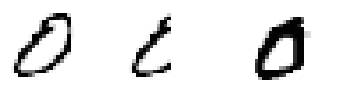

In [5]:
real_imgs, cut_imgs, class_imgs, labels = next(iter(dataloader))
labels = labels.float().view(-1, 1)
fig, axes = plt.subplots(1, 3)
i=7
axes[0].imshow(real_imgs[i].view(28,28), cmap="Greys")
axes[0].axis('off')
axes[1].imshow(cut_imgs[i].view(28,28), cmap="Greys")
axes[1].axis('off')
axes[2].imshow(class_imgs[i].view(28,28), cmap="Greys")
axes[2].axis('off')
print(labels[i])
plt.show()

In [6]:
gen = Skip_Generator()
disc = Discriminator()
gen.load_state_dict(torch.load('models/dropout/gen_13.pt'))
disc.load_state_dict(torch.load('models/dropout/disc_13.pt'))
gen.eval()
disc.eval()
gen.apply(test_dropout)
print()

In [7]:
z = torch.randn(size=(len(real_imgs), 100))
fake_imgs = gen(cut_imgs, labels, z)
real_predictions = disc(real_imgs, labels)
fake_predictions = disc(fake_imgs, labels)
print('Real Accuracy:', torch.sum(torch.round(real_predictions)).item() / len(real_imgs))
print('Fake Accuracy:', torch.sum(torch.round(fake_predictions)).item() / len(real_imgs))

Real Accuracy: 0.0
Fake Accuracy: 0.0


In [8]:
real_imgs, cut_imgs, class_imgs, labels = next(iter(dataloader))
labels = labels.float().view(-1, 1)

torch.Size([16, 1, 28, 28])


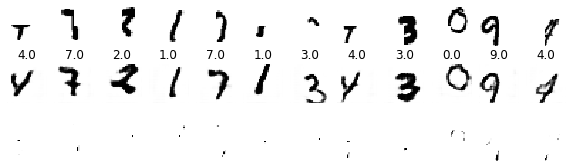

Custom Loss: 2.524540424346924
Discriminator Loss: 1.7198339700698853


In [26]:
z = torch.randn(size=(len(real_imgs), 100))
# z = torch.ones(size=(len(real_imgs), 100))
generated = gen(cut_imgs, labels, z)
print(generated.shape)
fig, axes = plt.subplots(3, 12, figsize=(10,3))
for y in range(12):
    axes[0, y].imshow(cut_imgs[0 + y].view(28,28), cmap="Greys")
    axes[0, y].axis('off')
#     axes[1, y].imshow(class_imgs[0 + y].view(28,28), cmap="Greys")
#     axes[1, y].axis('off')
    axes[1, y].imshow(generated[0 + y].detach().view(28,28), cmap="Greys")
    axes[1, y].axis('off')
    axes[1, y].set_title(labels[0 + y].item())
    axes[2, y].imshow(nn.functional.relu(cut_imgs[0 + y].view(28,28) - 100 * generated[0 + y].detach().view(28,28)), cmap="Greys")
    axes[2, y].axis('off')
    
plt.show()
print('Custom Loss:', base_loss(generated, cut_imgs).item())
print('Discriminator Loss:', nn.BCELoss()(fake_predictions, torch.ones_like(fake_predictions)).item())

10 -------------------------------------------


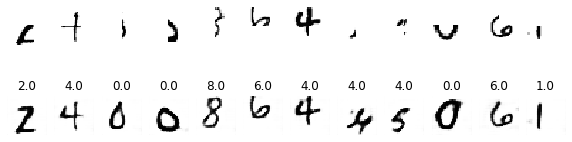

11 -------------------------------------------


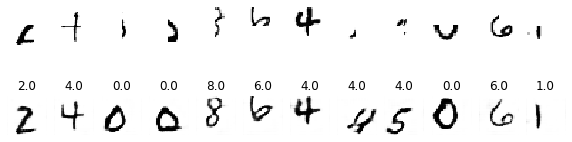

12 -------------------------------------------


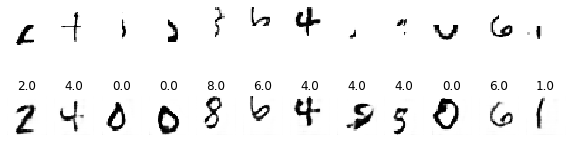

13 -------------------------------------------


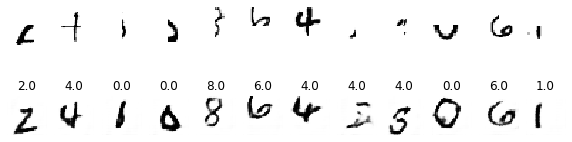

14 -------------------------------------------


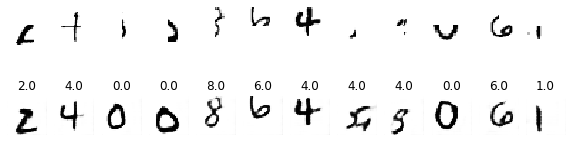

15 -------------------------------------------


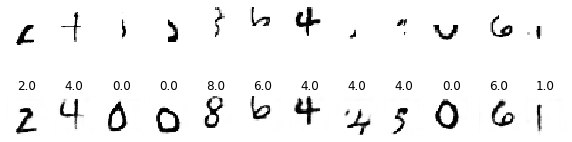

16 -------------------------------------------


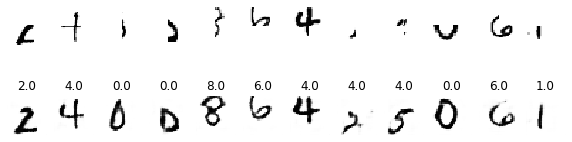

17 -------------------------------------------


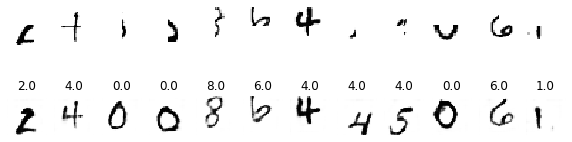

18 -------------------------------------------


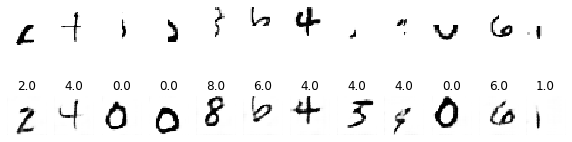

19 -------------------------------------------


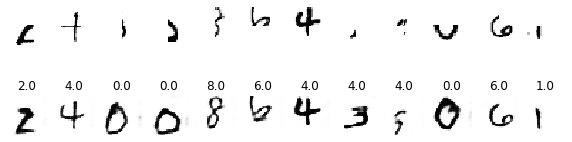

20 -------------------------------------------


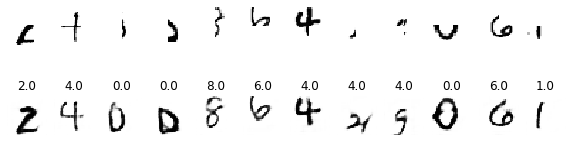

21 -------------------------------------------


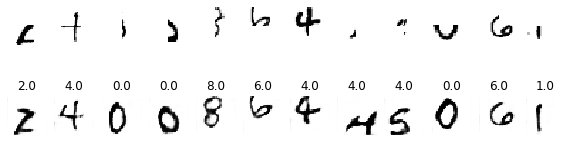

22 -------------------------------------------


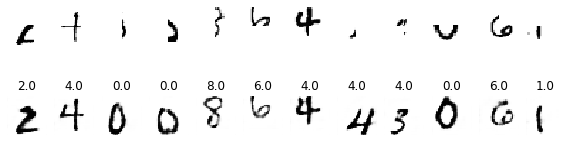

FileNotFoundError: [Errno 2] No such file or directory: 'models/dropout/gen_23.pt'

In [224]:
real_imgs, cut_imgs, class_imgs, labels = next(iter(dataloader))
labels = labels.float().view(-1, 1)
for i in range(10, 30, 1):
    gen = Skip_Generator()
    disc = Discriminator()
    gen.load_state_dict(torch.load('models/dropout/gen_{}.pt'.format(i)))
    gen.eval()
#     gen.apply(test_dropout)
    
    z = torch.randn(size=(len(real_imgs), 100))
    generated = gen(cut_imgs, labels, z)
    fig, axes = plt.subplots(2, 12, figsize=(10,3))
    for y in range(12):
        axes[0, y].imshow(cut_imgs[0 + y].view(28,28), cmap="Greys")
        axes[0, y].axis('off')
    #     axes[1, y].imshow(class_imgs[0 + y].view(28,28), cmap="Greys")
    #     axes[1, y].axis('off')
        axes[1, y].imshow(generated[0 + y].detach().view(28,28), cmap="Greys")
        axes[1, y].axis('off')
        axes[1, y].set_title(labels[0 + y].item())
    print(str(i) + ' -------------------------------------------')
    plt.show()
        

In [28]:
def complete_sketch(gen, sketch, c):
#     class_data = data.class_data[c]
#     class_img = class_data[torch.randint(0, data.class_lengths[c], (1,))]
    z = torch.rand((1, 1, 100)) 
#     plt.imshow(class_img.view(28,28), cmap="Greys")
#     plt.plot()
    
    completed_sketch = gen(sketch.view(1, 1, 28, 28), torch.Tensor([c]).float().view(1, 1), z)
    return completed_sketch

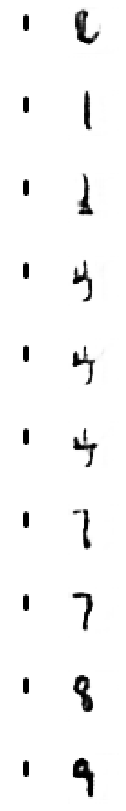

In [220]:
# human-drawn sketch completion example
gen.load_state_dict(torch.load('models/dropout/gen_20.pt'.format(i)))
gen.eval()
sketch = transforms.ToTensor()(Image.open('sketch.png').convert('L'))
# sketch = cut_imgs[2]
# print(sketch.shape)
# completed_sketch = complete_sketch(gen, sketch, 9)
fig, axes = plt.subplots(10, 2, figsize=(2, 15))
for i in range(10):
    completed_sketch = complete_sketch(gen, sketch, i)
    axes[i,0].imshow(sketch.view(28,28), cmap="Greys")
    axes[i,0].axis('off')
    axes[i,1].imshow(completed_sketch.detach().view(28,28), cmap="Greys")
    axes[i,1].axis('off')
# axes[2].imshow(generated[0].detach().view(28,28), cmap="Greys")
# axes[2].axis('off')

In [ ]:
# interpolation example

z1 = torch.rand()